# Hyper-Localized Analysis of Lead Poisoning in New York City

This analysis examines the nuances and the concerning disparities of lead poisoning in New York City's neighborhoods.

### Import libraries

#### Import pandas, seaborn, numpy, and matplotlib.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from IPython.core.display import HTML
%matplotlib inline

### Import the Data

In [8]:
df_bloodLvls = pd.read_csv("BloodLevels.csv")
df_bloodLvls.describe()

,geo_area_id,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested"
count,576.000000,564.000000,576.000000,576.000000,576.000000,576.000000,576.000000,0.0,576.000000,576.000000,576.000000
mean,252.708333,2.851064,2010.500000,1016.967014,99.234375,34.130208,20071.180556,NaN,46.913542,4.418403,1.484549
std,149.094653,1.255531,3.455053,3127.307541,274.841442,93.393634,48789.333503,NaN,38.924295,3.128868,1.072739
min,1.000000,1.000000,2005.000000,5.000000,0.000000,0.000000,800.000000,NaN,3.100000,0.000000,0.000000
25%,106.750000,2.000000,2007.750000,109.500000,12.000000,4.000000,4600.000000,NaN,17.675000,2.300000,0.700000
50%,256.000000,3.000000,2010.500000,267.000000,31.000000,11.000000,7500.000000,NaN,32.450000,3.600000,1.300000
75%,402.250000,4.000000,2013.250000,700.250000,68.000000,23.250000,12200.000000,NaN,65.250000,5.600000,1.900000
max,504.000000,5.000000,2016.000000,37344.000000,3082.000000,1014.000000,342900.000000,NaN,182.800000,19.900000,6.000000


#### Examine the head of the data.

In [35]:
df_bloodLvls.head(10)

,geo_type,geo_area_id,geo_area_name,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested_NOTES"
0,Borough,1,Bronx,1.0,2005,8245,NaN,595,NaN,167,NaN,64500,NaN,127.7,NaN,9.2,NaN,2.6,NaN
1,Borough,1,Bronx,1.0,2006,7272,NaN,474,NaN,144,NaN,67200,NaN,108.2,NaN,7.1,NaN,2.1,NaN
2,Borough,1,Bronx,1.0,2007,6174,NaN,438,NaN,135,NaN,68300,NaN,90.4,NaN,6.4,NaN,2.0,NaN
3,Borough,1,Bronx,1.0,2008,4254,NaN,292,NaN,105,NaN,69800,NaN,60.9,NaN,4.2,NaN,1.5,NaN
4,Borough,1,Bronx,1.0,2009,2742,NaN,278,NaN,103,NaN,70000,NaN,39.2,NaN,4.0,NaN,1.5,NaN
5,Borough,1,Bronx,1.0,2010,2625,NaN,290,NaN,101,NaN,70100,NaN,37.5,NaN,4.1,NaN,1.4,NaN
6,Borough,1,Bronx,1.0,2011,1996,NaN,231,NaN,75,NaN,70100,NaN,28.5,NaN,3.3,NaN,1.1,NaN
7,Borough,1,Bronx,1.0,2012,1396,NaN,184,NaN,81,NaN,66800,NaN,20.9,NaN,2.8,NaN,1.2,NaN
8,Borough,1,Bronx,1.0,2013,1312,NaN,193,NaN,74,NaN,65300,NaN,20.1,NaN,3.0,NaN,1.1,NaN
9,Borough,1,Bronx,1.0,2014,1186,NaN,177,NaN,68,NaN,63400,NaN,18.7,NaN,2.8,NaN,1.1,NaN


The data points in this dataset are sorted by borough over an interval of 2005-2016.

### Data Engineering

##### Real-world data is not pre-processed for data analysis. These three operations below will help us extract some context of NYC's lead problem.

1. Remove New York City for Borough List 
    - New York City is not a borough. This set of 12 data points represents holistic data, which is not helpful for a localized analysis.
2. Average Data Points of BLL>=5 Per Year
    - For example: Collect each data point with "time_period" 2005. Average these data points. 
3. Create a time series dataframe
    - Allows us to observe lead poisoning rise/decline/stagnancy over time

In [10]:

unique_cities = list(set(df_bloodLvls["geo_area_name"]))
forbidden_cities = ["Bronx", "Brooklyn", "New York City", "Queens", "Staten Island"]
unique_cities
for j in unique_cities:
    if j in forbidden_cities:
        unique_cities.remove(j)
    else:
        continue
        
averages_List = []
new_avgs = []
def avgs(loc):
    total = 0
    curNum = -1
    countList = []
    for i in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if df_bloodLvls["geo_area_name"][curNum] == loc:
            total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
            countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
        else:
            continue
    averages_List.append(total/12)
    new_avgs.append(total/12)
    return total/12, countList
        
    
for x in unique_cities:
    print(x, avgs(x))
    
for p in new_avgs:
    if p == 546.0833333333334:
        new_avgs.remove(p)
        
list_05 = []
list_06 = []
list_07 = []
list_08 = []
list_09 = []
list_10 = []
list_11 = []
list_12 = []
list_13 = []
list_14 = []
list_15 = []
list_16 = []
def points(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                list_09.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16.append(df_bloodLvls[column][curNum])

                
list_05_10 = []
list_06_10 = []
list_07_10 = []
list_08_10 = []
list_09_10 = []
list_10_10 = []
list_11_10 = []
list_12_10 = []
list_13_10 = []
list_14_10 = []
list_15_10 = []
list_16_10 = []
def points2(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_10.append(df_bloodLvls[column][curNum])
                
list_05_100 = []
list_06_100 = []
list_07_100 = []
list_08_100 = []
list_09_100 = []
list_10_100 = []
list_11_100 = []
list_12_100 = []
list_13_100 = []
list_14_100 = []
list_15_100 = []
list_16_100 = []
def points3(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_100.append(df_bloodLvls[column][curNum])
                
points("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL")
avg_05 = np.mean(list_05)
avg_06 = np.mean(list_06)
avg_07 = np.mean(list_07)
avg_08 = np.mean(list_08)
avg_09 = np.mean(list_09)
avg_10 = np.mean(list_10)
avg_11 = np.mean(list_11)
avg_12 = np.mean(list_12)
avg_13 = np.mean(list_13)
avg_14 = np.mean(list_14)
avg_15 = np.mean(list_15)
avg_16 = np.mean(list_16)

timeSeries = [avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16]
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

points2("Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL")
avg_05_10 = np.mean(list_05_10)
avg_06_10 = np.mean(list_06_10)
avg_07_10 = np.mean(list_07_10)
avg_08_10 = np.mean(list_08_10)
avg_09_10 = np.mean(list_09_10)
avg_10_10 = np.mean(list_10_10)
avg_11_10 = np.mean(list_11_10)
avg_12_10 = np.mean(list_12_10)
avg_13_10 = np.mean(list_13_10)
avg_14_10 = np.mean(list_14_10)
avg_15_10 = np.mean(list_15_10)
avg_16_10 = np.mean(list_16_10)

timeSeries_10 = [avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10]

points3("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL")
avg_05_100 = np.mean(list_05_100)
avg_06_100 = np.mean(list_06_100)
avg_07_100 = np.mean(list_07_100)
avg_08_100 = np.mean(list_08_100)
avg_09_100 = np.mean(list_09_100)
avg_10_100 = np.mean(list_10_100)
avg_11_100 = np.mean(list_11_100)
avg_12_100 = np.mean(list_12_100)
avg_13_100 = np.mean(list_13_100)
avg_14_100 = np.mean(list_14_100)
avg_15_100 = np.mean(list_15_100)
avg_16_100 = np.mean(list_16_100)

timeSeries_100 = [avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100]










data = {
    
    'BLL>=15':[avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16], 
    'BLL>=5':[avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10],
    'BLL>=10':[avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100],
    'years':[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



} 

df_timeSeries = pd.DataFrame(data)


Bayside - Little Neck (0.75, [0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0])
Union Square - Lower East Side (4.25, [0, 9, 2, 4, 5, 2, 1, 2, 4, 12, 4, 6])
Chelsea - Clinton (1.9166666666666667, [1, 2, 0, 1, 3, 4, 3, 3, 2, 2, 1, 1])
East New York (21.916666666666668, [14, 24, 15, 48, 23, 3, 12, 21, 17, 10, 47, 29])
Upper East Side (2.1666666666666665, [0, 0, 1, 5, 2, 3, 5, 0, 0, 1, 8, 1])
Stapleton - St. George (8.583333333333334, [6, 6, 19, 14, 4, 7, 7, 12, 4, 5, 1, 18])
Northeast Bronx (12.75, [14, 9, 12, 12, 8, 14, 17, 19, 19, 12, 6, 11])
Flushing - Clearview (8.333333333333334, [7, 10, 7, 8, 4, 9, 3, 7, 4, 11, 9, 21])
Bensonhurst - Bay Ridge (13.583333333333334, [16, 13, 21, 19, 12, 17, 10, 11, 12, 9, 11, 12])
Canarsie - Flatlands (6.0, [15, 2, 3, 9, 6, 2, 5, 17, 3, 2, 2, 6])
East Harlem (5.333333333333333, [2, 9, 6, 6, 4, 3, 8, 5, 7, 6, 2, 6])
Manhattan (44.666666666666664, [85, 92, 52, 55, 39, 45, 48, 32, 27, 20, 19, 22])
Coney Island - Sheepshead Bay (21.25, [25, 19, 21, 28, 20, 17, 17, 26,

In [11]:
df_timeSeries.head(25)

,BLL>=15,BLL>=5,BLL>=10,years
0,25.558140,974.255814,79.162791,2005
1,23.720930,903.674419,70.465116,2006
2,18.534884,793.325581,57.697674,2007
3,15.511628,527.813953,46.325581,2008
4,14.046512,389.069767,39.395349,2009
5,14.209302,351.627907,39.697674,2010
6,11.511628,288.023256,33.534884,2011
7,9.860465,204.837209,26.325581,2012
8,8.186047,181.558140,22.744186,2013
9,8.395349,164.372093,23.883721,2014


A time series dataset that has the average number of children with a BLL >= N per year. 

### Graph #1: Number of children with BLL>=5 from 2005-2016.

We are only interested in Blood Lead Level (BLL) >= 5. As denoted by the CDC, a BLL >= 5 is the minimum debiliating BLL in growing children.

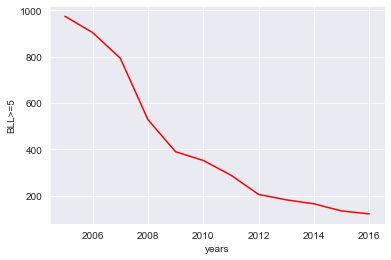

In [12]:
sns.set_style("darkgrid")
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)

###### NYC officials sampled this data from tested children. Thus, the number of children per year is relatively small in proportion to NYC's population. 

NYC has done a tremendous job handling the lead epidemic from 2005-2009. However, their progress has flattened in recent years.

### Applying an Exponential Regression

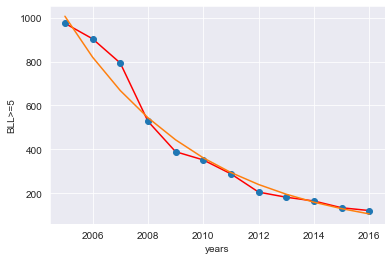

In [13]:
x_data = np.array(df_timeSeries['years'])

y = np.array(df_timeSeries["BLL>=5"])


log_x_data = np.log(x_data)
log_y_data = np.log(y)
curve_fit = np.polyfit(x_data, log_y_data, 1)

c = np.array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

y2 = np.exp(418.078525) * np.exp(-0.205069439*x_data)
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)
plt.plot(x_data, y, "o")
plt.plot(x_data, y2)


The data follows an exponential curve, indicating the the curve of people with BLL>=5 is flattening, not dying.

#### Converting Frequency of Children with BLL>=5 to Percentage of Children Tested From That Neighborhood

###### Reducing the data to percentages allows us to meaningfully and ethically compare the level of lead poisoning per neighbourhood.

In [14]:


pre_avgs = []
def normalize(location, column):
    curNum = -1
    countList = []
    total = 0
    for city in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if location == city:
            num = df_bloodLvls[column][curNum]/df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number Tested"][curNum]
            total += num
            countList.append(str(num) + " " + str(df_bloodLvls["time_period"][curNum]))
        else:
            continue
    pre_avgs.append(total/12)
    return total/12, countList
    
for x in unique_cities:
    print(x, normalize(x, "Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL"))
    

Bayside - Little Neck (0.021647527910685808, ['0.005 2012', '0.043 2007', '0.013181818181818182 2011', '0.023636363636363636 2010', '0.005909090909090909 2013', '0.004545454545454545 2015', '0.029545454545454545 2008', '0.028636363636363637 2009', '0.005909090909090909 2016', '0.05421052631578947 2005', '0.042105263157894736 2006', '0.004090909090909091 2014'])
Union Square - Lower East Side (0.04854544053143173, ['0.026326530612244898 2011', '0.11 2006', '0.008571428571428572 2016', '0.03510204081632653 2010', '0.017826086956521738 2012', '0.015128205128205128 2014', '0.010789473684210526 2015', '0.014047619047619048 2013', '0.0446 2009', '0.13122448979591836 2005', '0.06352941176470588 2008', '0.1054 2007'])
Chelsea - Clinton (0.04058442861461437, ['0.017619047619047618 2012', '0.006842105263157895 2015', '0.01411764705882353 2014', '0.02181818181818182 2010', '0.08857142857142856 2007', '0.10318181818181818 2005', '0.018636363636363635 2011', '0.08545454545454545 2006', '0.040454545

In [15]:
post_avgs = [num*100 for num in pre_avgs]
pre_avgs

data_perc = {'percentage':[0.04281228405989632,
 0.04940533210902779,
 0.04627197047432429,
 0.03056250322882549,
 0.0411019923647798,
 0.01576363391479021,
 0.04620347707715849,
 0.04234444855628685,
 0.029892926263853356,
 0.033445533024480396,
 0.07039073628676763,
 0.04638345634548972,
 0.04923491723974644,
 0.054181035266727205,
 0.047569084409144896,
 0.03300647999212133,
 0.05507983887378625,
 0.04058442861461437,
 0.039942472508327,
 0.04545726297128822,
 0.04303576981006101,
 0.06186094502207349,
 0.04854544053143173,
 0.04854298336130061,
 0.052680896880556355,
 0.05437447315931693,
 0.06756752457933472,
 0.06730336570252518,
 0.0195704988851728,
 0.04210489181076113,
 0.04205963624046144,
 0.05845717068878834,
 0.03524815115440116,
 0.022583257107534224,
 0.0512582517681402,
 0.04115177487791311,
 0.021647527910685808,
 0.05254493817355322,
 0.05227048809857823,
 0.030392793931916757,
 0.10856332753520498,
 0.05325962943357401,
 0.07705142348711261]}
df_perc = pd.DataFrame(data)

# Hyper-Local Variance Analysis
##### Analyzing and visualizing the lead risk per NYC neighorhood.

In [16]:
df_povertyRate = pd.read_csv("daby2.csv")
df_povertyRate.head(10)

,Neighborhood,% With Lead Risk,Poverty Rate,Median Income,Average Income,Borough,Unnamed: 6,Unnamed: 7
0,Bensonhurst - Bay Ridge,0.017237,20,"55,360","74,157",Brooklyn,NaN,NaN
1,Crotona -Tremont,0.013301,37.7,"26,910",NaN,Bronx,NaN,NaN
2,Long Island City - Astoria,0.014000,17,"65,392.00","97,379",Queens,NaN,NaN
3,Kingsbridge - Riverdale,0.009200,27.80%,"58,551",83674,Bronx,NaN,NaN
4,Canarsie - Flatlands,0.012754,9.60%,"67,669.00","83,059",Brooklyn,NaN,NaN
5,South Beach - Tottenville,0.007568,9.3,"80,361",90629.89,Staten Island,NaN,reason for outier is significant water quality...
6,Jamaica,0.017023,13.1,"48,559",76362,Queens,NaN,NaN
7,Southeast Queens,0.013103,13,"72,290",67190,Queens,NaN,NaN
8,Fresh Meadows,0.007632,13,"66,483",80815,Queens,NaN,NaN
9,Gramercy Park - Murray Hill,0.003333,11,"115,027","189,311.94",Manhattan,NaN,NaN


###### This dataset consists of fourty-three neighborhoods, with a respective lead risk, poverty rate, median income, and average income value. Additionally, their borough is included.

### Distribution of Percentage Lead Risk

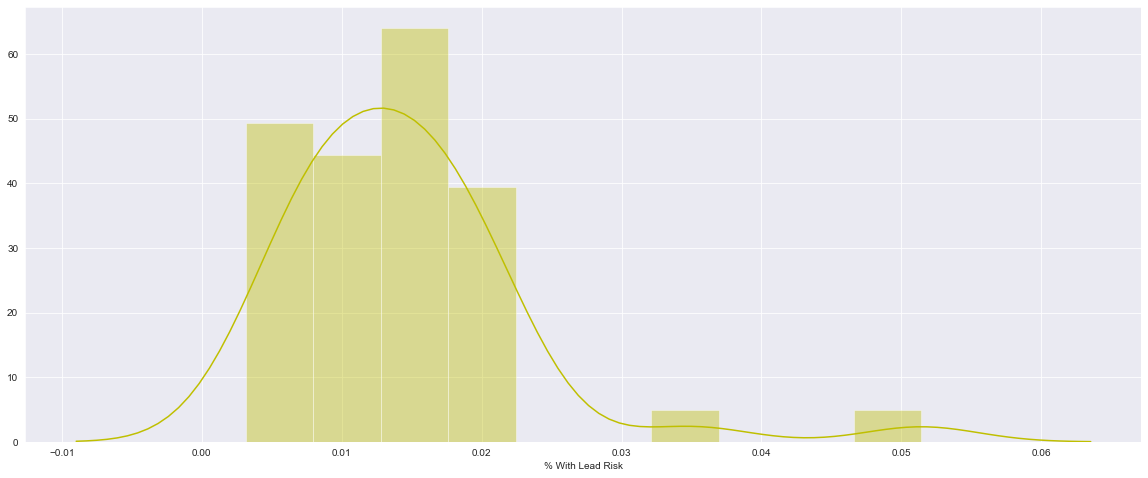

In [17]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_povertyRate["% With Lead Risk"], color="y")

###### The bell curve lives in the intervals [0%, ~2.5%]. The outliers in this dataset lie beyond 3%. 

In [24]:
df_pov = df_povertyRate

### Data Engineering Pt. 2

1. Fill in missing values
2. If data is too obscure, drop neighborhood and its respective data completely.
    - For ethical sanctity, if there is no data for a neighborhood, it cannot be compared fairly against other neighborhoods and must be removed.

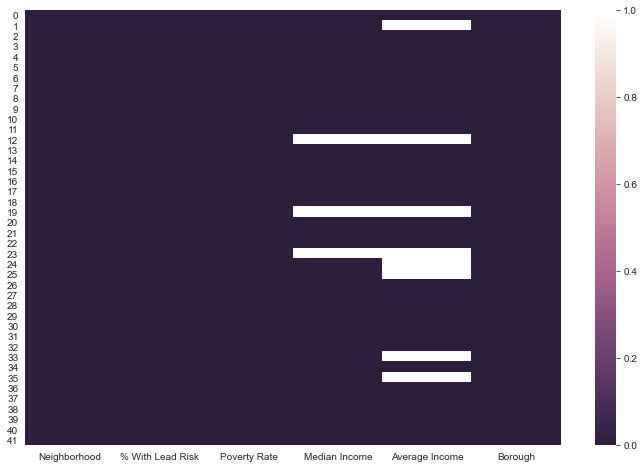

In [27]:
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_pov.isnull(), cmap=cmap)

###### There is a sizable portion of missing data in the columns "Average Income" and "Median Income."

In [28]:
df_pov.to_excel("missingVals.xlsx")

```python
plt.figure(figsize=(12,8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_pov_u.isnull(), cmap=cmap)
```

In [11]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/heatplot.png")

###### Using data from Point2Homes, we filled in the missing data. Dropping a neighorhood is unnecessary.

#### Now that we have complete, accurate, and comparable data, we can visualize NYC's lead risk geographically. 

#### Geographical heatmaps provides a visual rendition that can help identify areas of special attention.

# Geographical Visualization

```python 
import geopandas as gpd
sns.set(style="darkgrid")

nb = 'geo_export_7e724bd2-6b59-45bb-a9ce-4ccfcba60fb3.shp'
regions = gpd.read_file(nb)
regions.plot(figsize=(40,20))
plt.show()
```

In [2]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/nyc.png")

##### Blank canvas of NYC's neighborhoods.

```python 
dab = pd.read_csv("data.csv")

merged = regions.set_index('ntaname').join(dab.set_index('ntaname'))
merged = merged.reset_index()
merged[['ntaname', 'shape_area', 'shape_leng', 'geometry', 'Unnamed: 1']].sample(5)
merged['Unnamed: 1'] = merged['Unnamed: 1'].fillna(0)
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Lead Poisoning, New York City', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'inferno_r'
vmin, vmax = 0, 0.06
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Unnamed: 1', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
```

In [3]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/nyc2.png")

###### Brooklyn, South Queens, and Northern Manhattan (Harlem) are the obvious disaffected areas. However, with extrapolation, Northern Staten Island is also a high-risk principality. 

In [4]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/LeadRisk.png")

###### Seven out of the ten most at-risk neighborhoods are in Central Brooklyn. Two are in north Staten Island, and 1 in South Queens. This data thus bolsters the previous analysis.

In [18]:
cur = -1
for l in df_povertyRate["Average Income"]:
    cur += 1
    if isinstance(l, str) == True:
        if "," in l:
            df_povertyRate["Average Income"][cur] = df_povertyRate["Average Income"][cur].replace(',', '')

cur = -1
for l in df_povertyRate["Poverty Rate"]:
    cur += 1
    if isinstance(l, str) == True:
        if "," in l:
            df_povertyRate["Poverty Rate"][cur] = df_povertyRate["Poverty Rate"][cur].replace(',', '')
        if "%" in l:
            df_povertyRate["Poverty Rate"][cur] = df_povertyRate["Poverty Rate"][cur].replace('%', '')

cur = -1
for l in df_povertyRate["Median Income"]:
    cur += 1
    if isinstance(l, str) == True:
        if "," in l:
            df_povertyRate["Median Income"][cur] = df_povertyRate["Median Income"][cur].replace(',', '')
            
df_povertyRate['Average Income'] = df_povertyRate['Average Income'].astype(float)
df_povertyRate['Poverty Rate'] = df_povertyRate['Poverty Rate'].astype(float)
df_povertyRate['Median Income'] = df_povertyRate['Median Income'].astype(float)

<ipython-input-18-7776be228b5f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_povertyRate["Average Income"][cur] = df_povertyRate["Average Income"][cur].replace(',', '')
<ipython-input-18-7776be228b5f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_povertyRate["Poverty Rate"][cur] = df_povertyRate["Poverty Rate"][cur].replace('%', '')
<ipython-input-18-7776be228b5f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pover

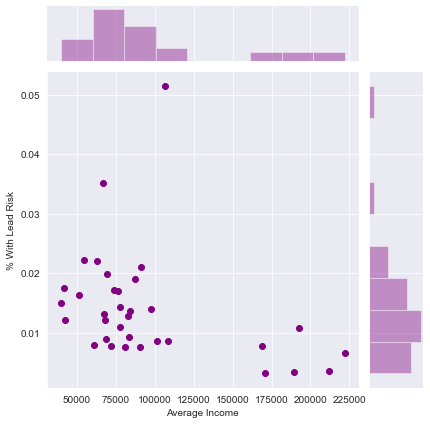

In [19]:
sns.jointplot(x='Average Income',y='% With Lead Risk',data=df_povertyRate,color='purple')

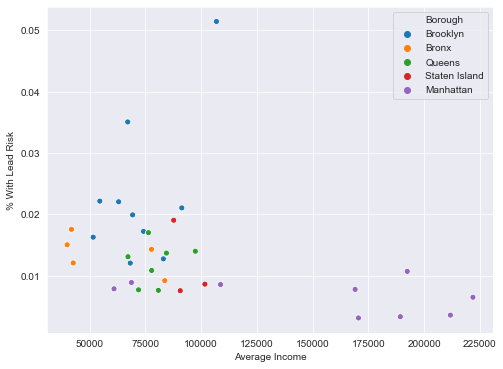

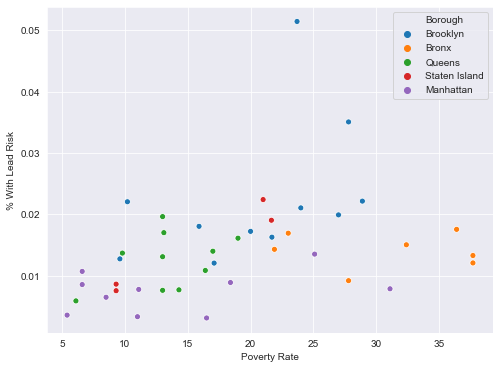

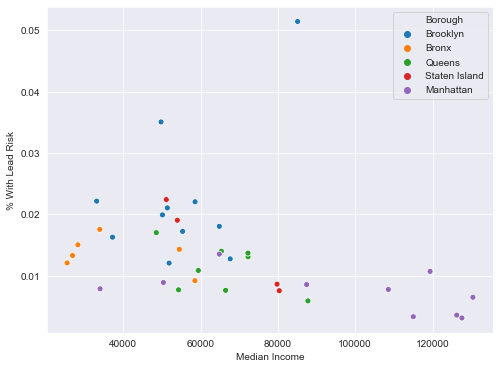

In [20]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Average Income", y="% With Lead Risk", hue="Borough")

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Poverty Rate", y="% With Lead Risk", hue="Borough")

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Median Income", y="% With Lead Risk", hue="Borough")

##### Poverty Conclusion: WIP

# Effects on Racial Minoritites

```python
df_dems = pd.read_excel("RaceData.xlsx")

minorities = df_dems.iloc[44]
minorities = list(minorities)

df_nbds = pd.read_csv("data.csv")

df_nbds
nbds =[]
for nbd in df_nbds["ntaname"]:
    nbds.append(nbd)
    
df_demsNbds = df_dems.iloc[4]
df_demsNbds = list(df_demsNbds)

nb = 'geo_export_7e724bd2-6b59-45bb-a9ce-4ccfcba60fb3.shp'
regions = gpd.read_file(nb)

f = [str(j) for j in df_demsNbds]

cleanedList = [x for x in f if x != "nan"]

sames = []
for x in cleanedList:
    for j in g:
        if x.find(j) != -1:
            sames.append(j)
sames2 = []
for x in cleanedList:
    for j in g:
        if x.find(j) != -1:
            sames2.append(x)
minorities.remove("    Black or African American")
del minorities[0:2]
mino = minorities[::4]
rang = []
for x in range(0,195):
    rang.append(str(x))


details = { 
    'ntaname' : cleanedList, 
    'val' : mino,  
} 
  
# creating a Dataframe object  
df_p = pd.DataFrame(details, columns = ['ntaname', 'val'], 
                  index = rang)
cur = -1
for x in df_p["ntaname"]:
    cur += 1
    for y in sames:
        if x.find(y) != -1:
            df_p['ntaname'] = df_p['ntaname'].replace(to_replace = df_p['ntaname'][cur],value = y)
        else:
            df_p.drop([df_p.index[cur]])
merged = regions.set_index('ntaname').join(df_p.set_index('ntaname'))
merged = merged.reset_index()
merged[['ntaname', 'shape_area', 'shape_leng', 'geometry', 'val']].sample(5)

fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Black Population in NYC Neighborhoods', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'mako_r'
vmin, vmax = 0, 100
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('val', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))
```


In [5]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/map.png")

In [7]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/nyc2.png")

In [8]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/map3.png")

##### Cross-referencing NYC's black population and lead hotspots, the two exclusively-compiled datasets elucidate a strong correlation.

##### This graph above highlights the areas where high lead risks intertwine with high black populations.

```python

def converter(cluster):
    if cluster == "Brooklyn":
        return 1
    if cluster == "Manhattan":
        return 2
    if cluster == "Staten Island":
        return 3
    if cluster == "Bronx":
        return 4
    if cluster == "Queens":
        return 5
    
df_pov["Cluster"] = df_pov["Borough"].apply(converter)

from sklearn.preprocessing import StandardScaler
df_pov_u.drop("Unnamed: 0", axis=1, inplace=True)
df_pov_u["Cluster"] = df_pov_u["Borough"].apply(converter)

scaler = StandardScaler()
df_pov_u.drop("Borough", axis=1, inplace=True)
scaler.fit(df_pov_u)

scaled_data = scaler.transform(df_pov_u)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1],
            c=df_pov_u["Cluster"], lw=0.1, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('seismic', 5))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(ticks=[1,2,3,4,5])
plt.clim(1, 5)
```

In [9]:
Image(url= "https://raw.githubusercontent.com/sam-shridhar1950f/nyc-lead/main/daby/finalmap.png")

#### This graph plots the Principal Component Analysis.